In [10]:
# Package import
from __future__ import print_function, division

import numpy as np
import time
import os
import copy
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

plt.ion()   # interactive mode

In [3]:
dir_images  = './data'

# CNN
# Data augmentation and input
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((100,150)),
        transforms.RandomCrop((80,120)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.Grayscale(1),
        torchvision.transforms.ColorJitter(brightness=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485], [0.229])
    ]),
    'val': transforms.Compose([
        transforms.Resize((100,150)),
        transforms.CenterCrop((100,150)),
        transforms.Grayscale(1),
        transforms.ToTensor(),
        transforms.Normalize([0.485], [0.229])
    ])
    }

data_dir = dir_images
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, 
                                              num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

[['Belize' 'Belize']
 ['Honduras' 'Belize']]


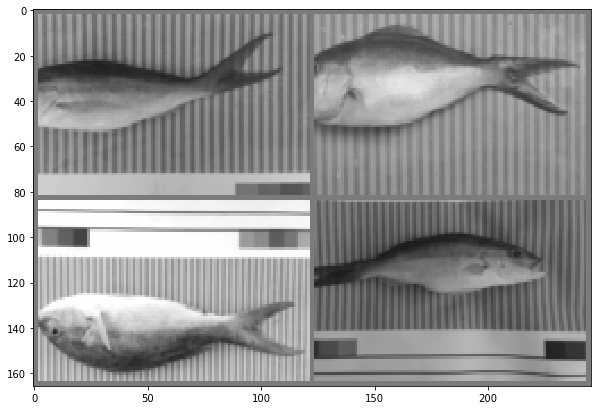

[['Belize' 'Belize']
 ['Honduras' 'Belize']]


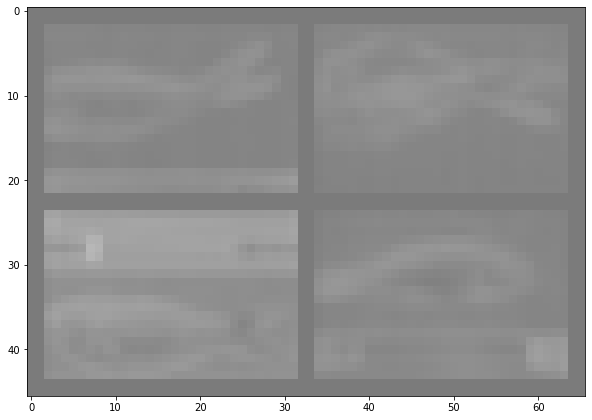

In [50]:
# Visualize Raw Data
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    #mean = np.array([0.485, 0.456, 0.406])
    mean = np.array([0.485])
    #std = np.array([0.229, 0.224, 0.225])
    std = np.array([0.229])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title,loc='right')
    plt.pause(0.001)  # pause a bit so that plots are updated
   
# raw training img
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs.repeat(1,3,1,1)

out = torchvision.utils.make_grid(inputs,nrow=2)
plt.rcParams['figure.figsize']=10,10
imshow(out, title=print(np.asarray([class_names[x] for x in classes]).reshape(2,2)))

# img after conv layer
conv = nn.Conv2d(3, 64, 7, 2, padding=3)
inputs = conv(inputs)
inputs = F.relu(inputs,inplace=True) #Your code here
inputs = F.max_pool2d(inputs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
inputs = torch.mean(inputs,1).reshape(inputs.shape[0],1,inputs.shape[2],inputs.shape[3]) 

out = torchvision.utils.make_grid(inputs.data,nrow=2)
plt.rcParams['figure.figsize']=10,10
imshow(out, title=print(np.asarray([class_names[x] for x in classes]).reshape(2,2)))